In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import scipy as sp
from scipy.optimize import curve_fit

# Tarea 03 Física Experimental 4

#### - David García Gómez
#### -Juan Montoya Sánchez

## Resumen:

Se tomaron los datos de intensidad de varias fuentes de luz para estudiar su espectro, y usando conocimientos de espectrometría, se sacaron conclusiones a cerca de la  temperatura y  materiales que caracterizan la lámpara. Se estudiaron las siguientes fuentes de luz:

-Lámpara incandescente

-Lámpara de Mercurio

-CFL (Compact fluorescent lamp)

-Pantalla del celular

-Flash del celular

## Introducción:

Desde el inicio de la humanidad, nos caracterizamos por mirar al cielo con curiosidad, tratando de explicar y entender cómo funcionaban las cosas. Los objetos celestes siempre fueron fuente de inspiración para los artistas, filósofos y científicos, sin embargo no fue hasta que se desarrolló la espectroscopía que pudimos empezar a desentrañar la luz y sus mecanismos. La espectroscopía nos permite entender la interacción de la materia con la luz. Su mecanismo intrínseco, es que la luz, como onda electromagnética, está asociada a una longitud de onda que la caracteriza y que cambia dependiendo de el material que emite la luz. La radiación electromagnética que generan los átomos, están relacionados a los saltos de energía de los electrones en los niveles que cada átomo tiene. Estos saltos de energía en las transiciones de los electrones, están relacionados con una longitud de onda específica, que es la longitud de onda que el átomo emite o absorbe. Esto significa que los átomos no absorben o emiten energía o radiación si ésta no tiene una frecuencia asociada a su estructura, lo que permite, a través del estudio de la luz, caracterizar los materiales.

En 1672 con los experimentos de Newton en los que utilizó un prisma para descomponer la luz blanca en todo su espectro, la espectroscopía empezó su camino, desarrollándose de tal forma, que para 1815, con un espectroscópio más preciso, se descubrió que el espectro de luz que el sol emitía, tenía discontinuidades, estas son las llamadas líneas de Fraunhofer, que más tarde, permitieron, a través de la caracterización de estas líneas para diferentes materiales, caracterizar los materiales de los que estaban compuestos las estrellas. Se descubrió por ejemplo que la atmósfera solar estaba compuesta de los mismos materiales que existen en la tierra, y se empezaron a caracterizar las estrellas, y a conocer sus materiales, extrayendo información de la luz que emiten.


Este informe consta de dos partes. En la primera parte, se realizará un análisis de la temperatura de una lámpara incandescente con la ley de Wein, y se ajustará la curva de emisión con los métodos aprendidos en el curso.

La segunda parte, consiste en la consulta de los espectros de emisión de la lámpara de mercurio, de la CFL, de la luz de la pantalla del celular y de su flash, para así caracterizar los materiales que usa y sus mecanismos de funcionamiento.

## Recolección de los datos:

In [154]:
#Ubicamos los archivos de los datos necesarios

dir_HG = 'Montoya_García/Hg_Ar.Master.sample'
dir_CFL = 'Montoya_García/CFL.Master.sample'
dir_Flash = 'Montoya_García/Flash_cel.Master.sample'
dir_Pant = 'Montoya_García/Pantalla_cel.Master.sample'
dir_Lamp = 'Montoya_García/Lampara_incandecente.Master.sample'

# Sabemos que en los archivos de texto, los valores empiezan en la fila 15 y terminan en la fila 2062
ini = 14
fin = 2062-14
# Leemos con pandas los archivos
columns = ['X', 'Y'] #Columnas de los archivos de texto

df_HG = pd.read_csv(dir_HG, skiprows = ini, nrows = fin, sep = '\t', names = columns) #Lampara de mercurio
df_CFL = pd.read_csv(dir_CFL, skiprows = ini, nrows = fin, sep = '\t', names = columns) # compact fluorescent lamp ó esfera integradora
df_Flash = pd.read_csv(dir_Flash, skiprows = ini, nrows = fin, sep = '\t', names = columns)#Flash de celular
df_Pant = pd.read_csv(dir_Pant, skiprows = ini, nrows = fin, sep = '\t', names = columns) #Pantalla de celular
df_Lamp = pd.read_csv(dir_Lamp, skiprows = ini,nrows = fin,  sep = '\t', names = columns) #Lampara incandecente



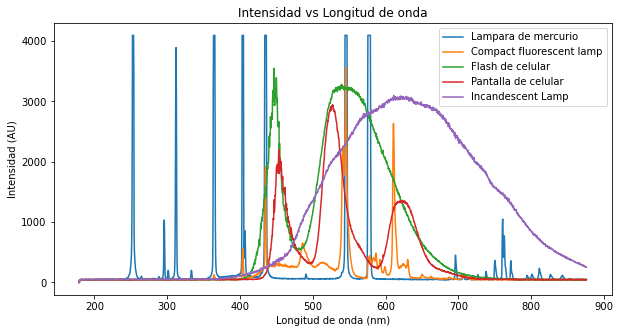

In [155]:
# Graficamos los datos de intensidad vs longitud de onda
plt.figure(figsize=(10,5))
plt.plot(df_HG['X'], df_HG['Y'], label = 'Lampara de mercurio')
plt.plot(df_CFL['X'], df_CFL['Y'], label = 'Compact fluorescent lamp')
plt.plot(df_Flash['X'], df_Flash['Y'], label = 'Flash de celular')
plt.plot(df_Pant['X'], df_Pant['Y'], label = 'Pantalla de celular')
plt.plot(df_Lamp['X'], df_Lamp['Y'], label = 'Incandescent Lamp')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Intensidad (AU)')
plt.legend()
plt.title('Intensidad vs Longitud de onda')
plt.show()


## Primera parte:

Las lámparas incandescentes consisten en un circuito al vacío, generalmente encerrado un una pequeña cápsula de vidrio, en el que se pasa una corriente eléctrica a través de un material. Las lámparas incandescentes más comunes, utilizan filamentos de carbono o tungsteno, que al aplicarles la corriente eléctrica, se calientan y emiten luz. En la cápsula de vidrio hay gases inertes, generalmente Argón, que permite que el filamento no se oxide, y aumente su duración.

Las lámparas incandescentes, son muy ineficientes, por lo que su producción fue escalonadamente deteriorándose, hasta que lámparas como la CFL y otras lámparas con tegnología led, fueron acaparando el mercado.

Este tipo de lámparas, tienen la propiedad de emitir continuamente en todos los espectros de luz debido a su alta temperatura, sin embargo, gran parte de la energía que consume se transforma en luz no visible, (infrarojo o ultravioleta) lo que hace su funcionamiento bastante ineficiente. 

 

Se dispone de una esfera integradora, con una fuente de luz halógena y un espectrómetro digital Thorlabs CCS100.

1. Conecte el espectrómetro al pc e inicie el programa Thorlabs OSA.
2. Conecte la esfera integradora al adaptador DC/AC, y enciéndala.
3. Ubique el estándar difuso en el puerto de medida de la esfera integradora. Conecte el espectrómetro al puerto R de la esfera integradora usando la fibra óptica de 200 um.
4. Mida el espectro de la lámpara de la esfera integradora.
5. Determine el pico del espectro y la temperatura de la lámpara por medio de la ley de Wien
6. Ajuste el espectro obtenido usando la ley de Planck y determine la temperatura de la misma. Compare el resultado con lo obtenido en el paso anterior.
7. Determine la bondad del ajuste con chi cuadrado.


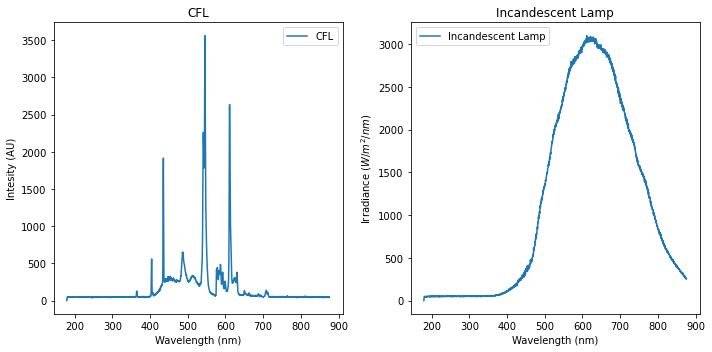

In [156]:
# Gaficar los datos de CFL y lampara incandecente en distintos plots

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].plot(df_CFL['X'], df_CFL['Y'], label = 'CFL')
ax[0].set_title('CFL')
ax[0].set_xlabel('Wavelength (nm)')
ax[0].set_ylabel('Intesity (AU)')
ax[0].legend()

ax[1].plot(df_Lamp['X'], df_Lamp['Y'], label = 'Incandescent Lamp')
ax[1].set_title('Incandescent Lamp')
ax[1].set_xlabel('Wavelength (nm)')
ax[1].set_ylabel('Irradiance ($ W/m^2/nm $)')
ax[1].legend()  

plt.tight_layout()
plt.show()



In [164]:
def intensity(A, lam):
    """
    Función que calcula la intensidad de la luz en una longitud de onda dada
    A: coeficiente de la función de Planck
    B: coeficiente de la función de Planck
    lam: longitud de onda
    """
    return A *np.exp(((lam-m)**2)/(2*B**2))

In [166]:
b = 2.897e-3 # Constante de Wien

In [167]:
def Wein_L(lam):
    """
    Función que calcula la temperatura de un objeto a partir de la longitud de onda máxima
    lam: longitud de onda máxima
    """
    return b / lam


Vamos a hallar a qué longitud de onda corresponde el pico de emisión de la lámpara incandescente y así hallar su temperatura con la ley de Wein:

In [168]:
##Hallamos el máximo con el método np.argmax
MX=np.argmax(df_Lamp["Y"])

#print(df_Lamp["Y"][MX])
print("El pico de emisión de la lámpara incandescente se encuentra en",df_Lamp["X"][MX], "nm")

El pico de emisión de la lámpara incandescente se encuentra en 611.2 nm


Ahora, usando la ley de Wein, podemos hallar la temperatura:

In [169]:
print("Usando la ley the Wein para aproximar la temperatura de la lámpara tenemos que es de:",Wein_L(df_Lamp["X"][MX]*10e-10),"°K")

Usando la ley the Wein para aproximar la temperatura de la lámpara tenemos que es de: 4739.856020942408 °K


El rango de temperatura de una lámpara incandescente está entre los 2100 °K y los 3200°K, por lo que la aproximación que tenemos usando la ley de Wein no es muy acertada. Esto se debe a que estamos asumiendo que la lámpara incandescente emite como un cuerpo negro, lo cual no es cierto, pero que como aproximación, nos puede dar una idea "cercana" de la temperatura.

A los espectros que no incluyen una corrección de estos factores se les llama
“relativos” y suelen ser dados en unidades arbitrarias de emisión por longitud
de onda. Para interpretar estos espectros se deben comparar con otros
tomados con el mismo sistema.

Para obtener un espectro absoluto se debe caracterizar plenamente el
sistema de medida usando un estándar calibrado.

In [178]:
def gaussian(x, mu, sigma):
    return MX * np.exp(-(x - mu)**2 / (2 * sigma**2))

mej_val: [1. 1.]
[[inf inf]
 [inf inf]]
[inf inf]


C:\Users\Arturo\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


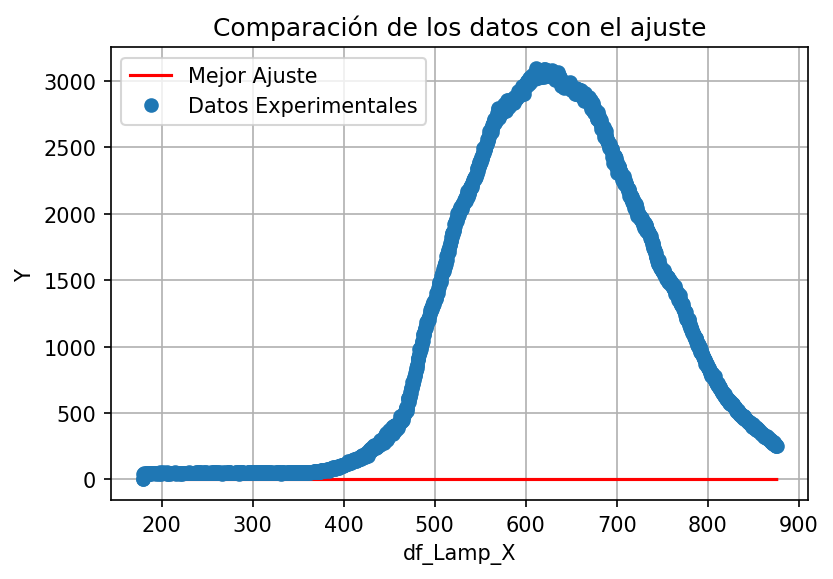

In [183]:
m=np.mean(df_Lamp["Y"])
val_ini = [100,100]
mej_val, cov = curve_fit(gaussian,df_Lamp['X'],df_Lamp['Y'])
print('mej_val: {}'.format(mej_val))
print(cov)
perr = np.sqrt(np.diag(cov))
print(perr)
yaj = gaussian(df_Lamp['X'],mej_val[0], mej_val[1],)
plt.figure(dpi=150)
plt.plot(df_Lamp['X'], yaj, 'r', label='Mejor Ajuste')
plt.plot(df_Lamp['X'], df_Lamp['Y'], 'o', label='Datos Experimentales')
plt.xlabel('df_Lamp_X')
plt.ylabel('Y')
plt.title('Comparación de los datos con el ajuste')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Parte 2:

### Lámpara de Mercurio-Argón:

Primero veamos la gráfica completa de los gráficos obtenidos para la lámpara de mercurio argón:

In [216]:


plt.figure(figsize=(20,10))
plt.plot(df_HG['X'], df_HG['Y'], label = 'Lampara de mercurio-argón')

plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Intensidad (AU)')
plt.legend()
plt.title('Intensidad vs Longitud de onda')
plt.show()

El objetivo de esta parte, es encontrar a qué elemento corresponden los picos de emisión que vemos en la gráfica anterior, por lo que nos remitiremos a las bases de datos científicas donde se encuentra la información de los espectros de emisión de ambos elementos.

En este caso, solo tomamos los datos de los picos más relevantes del mercurio y del argón, ya que pueden existir más picos de emisión de ambos elementos, pero no son tan pronunciados como los que tomamos:

In [219]:
# Picos de emisión del mercurio en nm
picos_mercurio = np.array([ 253.7, 365.0, 404.7, 435.8, 546.1, 576.9, 579.1, 580.4])

# Picos de emisión del argón en nm
picos_argon = np.array([488, 514, 693,748,760,773, 803, 826.5, 852.1])

print("Los picos de emisión del mercurio en nm son:",picos_mercurio)

print("Los picos de emisión del argón en nm son:",picos_argon)

Los picos de emisión del mercurio en nm son: [253.7 365.  404.7 435.8 546.1 576.9 579.1 580.4]
Los picos de emisión del argón en nm son: [488.  514.  693.  748.  760.  773.  803.  826.5 852.1]


Ahora creemos una gráfica que nos permita diferenciar los picos de ambos elementos comparado con los datos obtenidos en el laboratorio:

In [218]:
plt.figure(figsize=(20,10))
plt.plot(df_HG['X'], df_HG['Y'], label = 'Lampara de mercurio-argón')
plt.scatter(picos_mercurio, [1000]*len(picos_mercurio), label='Mercurio', color='blue', marker='^')
plt.scatter(picos_argon, [1000]*len(picos_argon), label='Argón', color='red', marker='s')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Intensidad (AU)')
plt.legend()
plt.title('Intensidad vs Longitud de onda')
plt.show()

Podemos ver claramente que los pequeños triángulos azules, corresponden a los picos de emisión del mercurio, y los pequeños cuadrados rojos, corresponden a los picos de emisión del argón, lo que nos dice que en su mayoría, los picos de emisión de la lámpara entre los 0 nm y los 600 nm corresponden al mercurio, y los picos menos pronunciados que se ven después de los 650 nm corresponden al argón.